In [31]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [7]:
with open(f'dataframes/{0}.df', "rb") as f:
    df = pickle.load(f)

df.head()

,Rx,Tx,MPP Start Time (s),MPP Stop Time (s),Voltages (mV),Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,1.756403e+09,1.756403e+09,"[272.11, 302.47, 303.23, 302.93, 302.62, 302.2...",915,1,5
1,Tag2,Tag1,1.756403e+09,1.756403e+09,"[84.19, 56.34, 56.57, 56.88, 56.5, 56.73, 56.9...",915,1,5


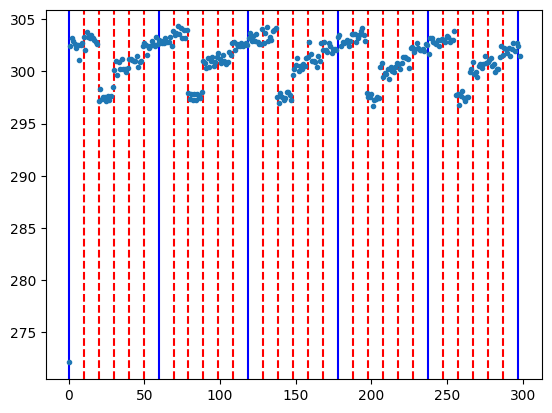

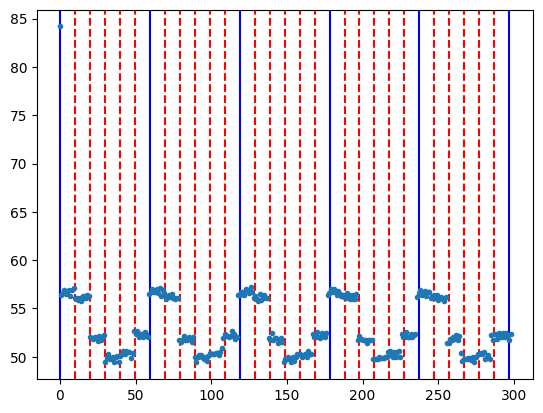

In [52]:

time_per_phase = 10/1000  # s
num_phases=6
num_mpps=df.iloc[0]['NumMPPs']
sampling_rate=1000
plotting=True
ver_lines = [0] + [ (time_per_phase-time_per_phase*0.01) * sampling_rate * (i + 1) for i in range(num_phases*num_mpps)]

processedDF=pd.DataFrame(columns=["Rx","Tx", "Voltages (mV)", "Phase1","Phase2","Phase3","Phase4","Phase5","Phase6",
                                "Frequency (MHz)", "Run Exp Num", "NumMPPs"])
for df_idx in range(len(df)):
    voltages=df.iloc[df_idx]['Voltages (mV)']
    phase_medians={
        1:[],
        2:[],
        3:[],
        4:[],
        5:[],
        6:[],
    }
    for idx,v in enumerate(ver_lines):
        if idx<len(ver_lines)-1:
            phase_medians[int(idx%num_phases)+1].append(np.median(voltages[int(ver_lines[idx]):int(ver_lines[idx+1])]))   
        if plotting:
            if idx%num_phases==0:
                plt.axvline(x=v, color='b', linestyle='-')
            else:
                plt.axvline(x=v, color='r', linestyle='--')
    entry={
        "Rx": df.iloc[df_idx]["Rx"],
        "Tx":df.iloc[df_idx]["Tx"],
        "Voltages (mV)":df.iloc[df_idx]["Voltages (mV)"],
        "Phase1":phase_medians[1],
        "Phase2":phase_medians[2],
        "Phase3":phase_medians[3],
        "Phase4":phase_medians[4],
        "Phase5":phase_medians[5],
        "Phase6":phase_medians[6],
        "Frequency (MHz)":df.iloc[df_idx]["Frequency (MHz)"],
        "Run Exp Num":df.iloc[df_idx]["Run Exp Num"],
        "NumMPPs":df.iloc[df_idx]["NumMPPs"],
    }
    
    # Identify and print bad MPPs
    bad=False
    for k in phase_medians.keys():
        assert(len(phase_medians[k])==num_mpps)
        if np.std(phase_medians[k])>1:
            print(f"Bad data found at {df_idx} idx at phase {k}.")
            print(len(phase_medians[k]), np.mean(phase_medians[k]), np.std(phase_medians[k]))
    
    processedDF=pd.concat([processedDF,pd.DataFrame([entry])],ignore_index=True)
    if plotting:
        plt.plot(voltages,'.')
        plt.show()
    
    

In [53]:
processedDF

,Rx,Tx,Voltages (mV),Phase1,Phase2,Phase3,Phase4,Phase5,Phase6,Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,"[272.11, 302.47, 303.23, 302.93, 302.62, 302.2...","[302.55, 302.815, 302.93, 302.89, 302.74]","[303.16, 303.77, 303.77, 303.46, 303.01]","[297.51, 297.745, 297.51, 297.51, 297.63]","[300.26, 300.90999999999997, 300.525, 299.99, ...","[300.985, 301.17, 301.21, 300.98, 300.795]","[302.51, 302.62, 302.13, 302.17, 302.17]",915,1,5
1,Tag2,Tag1,"[84.19, 56.34, 56.57, 56.88, 56.5, 56.73, 56.9...","[56.73, 56.73, 56.65, 56.61, 56.57]","[56.04, 56.114999999999995, 56.12, 56.11499999...","[51.92, 51.77, 51.845, 51.77, 51.80500000000001]","[49.9, 49.974999999999994, 49.745000000000005,...","[50.355000000000004, 50.39, 50.24, 50.47, 50.28]","[52.3, 52.15, 52.11, 52.144999999999996, 52.26]",915,1,5
